<a href="https://colab.research.google.com/github/shreyasat27/MSc-QT-/blob/main/poster_plts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qutip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 32.5 MB/s eta 0:00:00


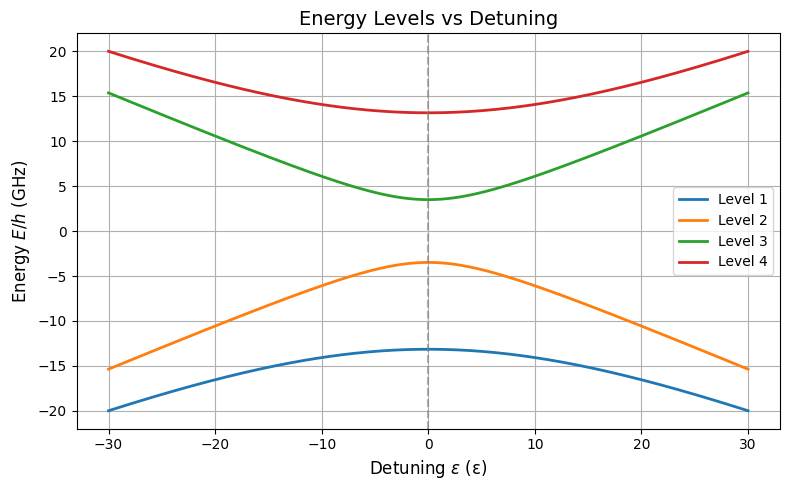

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Parameters
t_total = 9.6        # Total tunnel coupling (GHz)
omega_R = 5.4        # Cavity resonance freq (GHz)
theta = np.pi / 6    # Angle for splitting t_sc and t_sf (30°)

t_sc = t_total * np.cos(theta)  # Spin-conserving
t_sf = t_total * np.sin(theta)  # Spin-flipping
B = 1.0                         # Zeeman splitting (GHz)

def H_dqd(eps, t_sc, t_sf, B):
    """
    Returns the double quantum dot Hamiltonian in the basis:
    |L↓⟩, |L↑⟩, |R↓⟩, |R↑⟩
    """
    H = np.array([
        [-eps/2 - B/2,     0,         -t_sc,      -t_sf],
        [     0,      -eps/2 + B/2,   -t_sf,      -t_sc],
        [ -t_sc,       -t_sf,      eps/2 - B/2,     0  ],
        [ -t_sf,       -t_sc,          0,       eps/2 + B/2]
    ])
    return Qobj(H)

# Energy spectrum calculation
eps_range = np.linspace(-30, 30, 300)  # Detuning ε (GHz)
energies = []

for eps in eps_range:
    H = H_dqd(eps, t_sc, t_sf, B)
    eigs = H.eigenenergies()
    energies.append(sorted(eigs))  # Sort for consistent plotting

energies = np.array(energies)

# Plotting
plt.figure(figsize=(8, 5))
for i in range(4):
    plt.plot(eps_range, energies[:, i], lw=2, label=f"Level {i+1}")
plt.axvline(0, linestyle="--", color="gray", alpha=0.6)

plt.xlabel("Detuning $\\varepsilon$ (ε)", fontsize=12)
plt.ylabel("Energy $E/h$ (GHz)", fontsize=12)
plt.title("Energy Levels vs Detuning", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



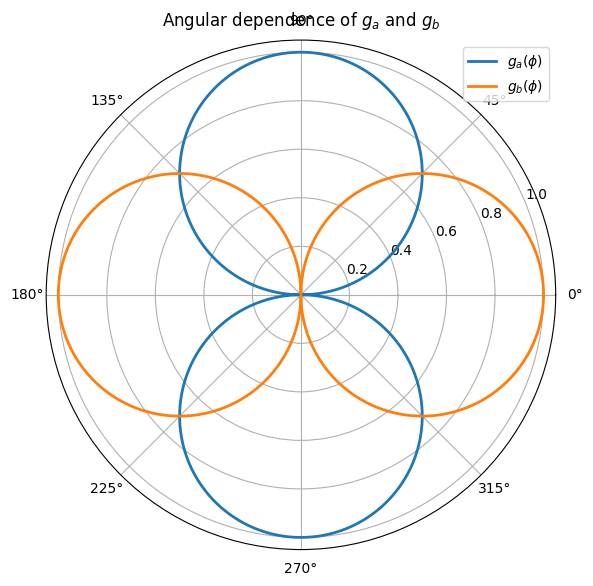

In [ ]:
#not correct

import numpy as np
import matplotlib.pyplot as plt

#zero-detuning case

# Angle phi from 0 to 2pi
phi = np.linspace(0, 2*np.pi, 360)

# Base coupling constant
g0 = 1.0  # Arbitrary units or GHz

# From the relation:
# g_a = g0 * sin(phi)
# g_b = g0 * cos(phi)
# Based on the expressions for d01 and d02 at phi0 = 0

g_a = g0 * np.sin(phi)
g_b = g0 * np.cos(phi)

# Polar plot
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)
ax.plot(phi, np.abs(g_a), label=r'$g_a(\phi)$', color='tab:blue', lw=2)
ax.plot(phi, np.abs(g_b), label=r'$g_b(\phi)$', color='tab:orange', lw=2)
ax.set_title("Angular dependence of $g_a$ and $g_b$", va='bottom')
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


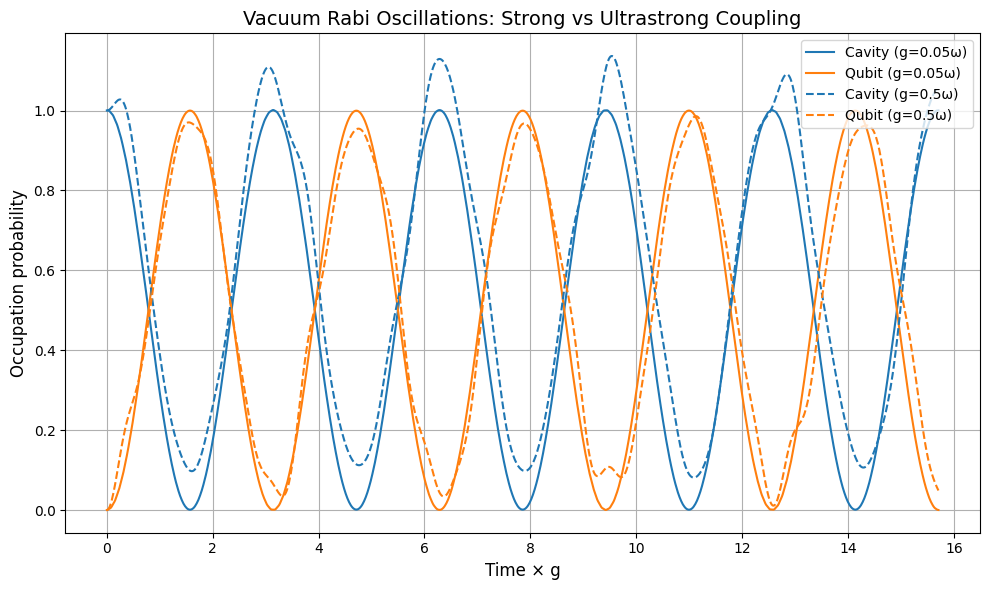

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# System constants
omega = 2 * np.pi
N = 4
theta = 0
epsilon = 2 * omega * np.sin(theta)
t_c = 1 * omega * np.cos(theta)

# Operators
a = tensor(destroy(N), qeye(2))
adag = a.dag()
sigma_x = tensor(qeye(N), Qobj([[0, 1], [1, 0]]))
sigma_z = tensor(qeye(N), Qobj([[1, 0], [0, -1]]))
idn = tensor(qeye(N), Qobj([[1, 0], [0, 1]]))

# Initial state: 1 photon in cavity, qubit in ground state
psi0 = tensor(basis(N, 1), basis(2, 0))

def simulate_dynamics(g):
    """Simulate the dynamics for a given coupling strength g."""
    tlist = np.linspace(0, 5*np.pi/g, 1000)
    H_interaction = (g * (a + adag)) * (np.sin(theta) * sigma_z + np.cos(theta) * sigma_x)
    omega_R = 2 * np.sqrt(((epsilon/2)**2) + t_c**2)
    H_res = omega_R * adag * a
    H_matrix = -np.sqrt(((epsilon/2)**2) + t_c**2) * sigma_z
    H = H_matrix + H_interaction + H_res
    c_ops = []  # no dissipation for this plot
    result = mesolve(H, psi0, tlist, c_ops, [adag * a, ((-sigma_z + idn) / 2)])
    return tlist * g, result.expect[0], result.expect[1]

# Simulate both cases
tlist_05g, cavity_05g, qubit_05g = simulate_dynamics(0.05 * omega)
tlist_5g,  cavity_5g,  qubit_5g  = simulate_dynamics(0.5  * omega)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
# g = 0.05 omega (solid lines)
ax.plot(tlist_05g, cavity_05g, label="Cavity (g=0.05ω)", color='tab:blue', linestyle='-')
ax.plot(tlist_05g, qubit_05g, label="Qubit (g=0.05ω)", color='tab:orange', linestyle='-')
# g = 0.5 omega (dashed lines)
ax.plot(tlist_5g, cavity_5g, label="Cavity (g=0.5ω)", color='tab:blue', linestyle='--')
ax.plot(tlist_5g, qubit_5g, label="Qubit (g=0.5ω)", color='tab:orange', linestyle='--')

ax.set_xlabel("Time × g", fontsize=12)
ax.set_ylabel("Occupation probability", fontsize=12)
ax.set_title("Vacuum Rabi Oscillations: Strong vs Ultrastrong Coupling", fontsize=14)
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


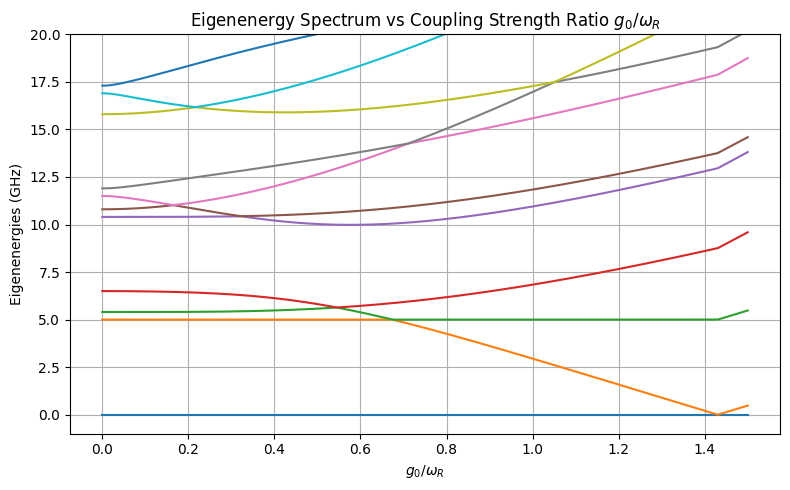

[-2.5  2.5  2.9  4.   7.9  8.3  9.   9.4 13.3 14.4 14.8 19.8]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# ----- Parameters -----
omega_R = 5.4 * 2 * np.pi    # GHz -> rad/s
E_plus = 18 * 2 * np.pi     # GHz
E_minus = 8 * 2 * np.pi   # GHz
tunnel_coupling = 9.6 * 2 * np.pi

phi = np.pi / 4               # 45 degrees for tunneling
theta = np.pi / 4             # 45 degrees for g_a/g_b

t_sc = tunnel_coupling * np.cos(phi)
t_sf = tunnel_coupling * np.sin(phi)

# Coupling scan
g0_vals = np.linspace(0, 1.5 * omega_R, 1000)   # GHz range converted to rad/s
g_angle = np.pi / 4                            # 45 degrees

# ----- System dimensions -----
Nph = 3             # photon cutoff
Ndot = 4            # 4-level system (|L↑>, |L↓>, |R↑>, |R↓>)

# Operators on dot+spin system
I4 = qeye(Ndot)
a = destroy(Nph)
adag = a.dag()
Iph = qeye(Nph)

# Define the system states in this order:
# |L↑>, |L↓>, |R↑>, |R↓>
# Define Pauli-like ops for spin (σ) and dot (τ)
# Custom matrices for 4-level space (manually construct):

# σ_z acts on spin up/down
sigma_z = Qobj(np.diag([1, -1, 1, -1]))
sigma_p = Qobj([[0, 1, 0, 0],
                [0, 0, 0, 0],
                [0, 0, 0, 1],
                [0, 0, 0, 0]])
sigma_m = sigma_p.dag()

# τ_z acts on L/R
tau_z = Qobj([[1, 0, -1, 0],
              [0, 1, 0, -1],
              [-1, 0, 1, 0],
              [0, -1, 0, 1]]) / 2

tau_p = Qobj([[0, 0, 1, 0],
              [0, 0, 0, 1],
              [0, 0, 0, 0],
              [0, 0, 0, 0]])
tau_m = tau_p.dag()

tau_x = tau_p + tau_m

# Tensor to total Hilbert space
def tensor_op(dot_op, ph_op):
    return tensor(dot_op, ph_op)

# Hamiltonian H_0
H0 = tensor_op(I4, omega_R * adag * a) \
     + tensor_op((E_plus + E_minus)/4 * tau_z, Iph) \
     + tensor_op((E_plus - E_minus)/4 * sigma_z, Iph)

# Storage for eigenenergies
eigenvals = []

# Sweep over g0
for g0 in g0_vals:
    g_a = g0 * np.cos(g_angle)
    g_b = g0 * np.sin(g_angle)

    # Interaction Hamiltonians
    H1 = g_a * (tensor_op(tau_z * sigma_p, a) + tensor_op(tau_z * sigma_m, adag)) \
       + g_b * (tensor_op(tau_p, a) + tensor_op(tau_m, adag))

    H2 = g_a * (tensor_op(tau_z * sigma_m, a) + tensor_op(tau_z * sigma_p, adag)) \
       + g_b * (tensor_op(tau_m, a) + tensor_op(tau_p, adag))

    H = H0 + H1 + H2

    evals = H.eigenenergies()
    eigenvals.append(evals[:16])

# Convert to numpy array for plotting
eigenvals = np.array(eigenvals)


# ----- Plotting -----
plt.figure(figsize=(8, 5))
for i in range(eigenvals.shape[1]):
    plt.plot(g0_vals / omega_R, eigenvals[:, i] / (2*np.pi)-eigenvals[:, 0] / (2*np.pi), label=f'Level {i+1}')


plt.title(r"Eigenenergy Spectrum vs Coupling Strength Ratio $g_0 / \omega_R$")
plt.xlabel(r'$g_0/\omega_R$')
plt.ylabel('Eigenenergies (GHz)')
plt.ylim(-1,20)
plt.grid(True)
plt.tight_layout()
plt.show()
print(np.round(eigenvals[0] / (2*np.pi), 6))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# Parameters
omega =  2 * np.pi           # Resonant frequency (GHz)
g_a = 0.3                   # Spin-photon coupling strength
g_b = 0.4                 # Charge-photon coupling strength
N = 4                        # Number of Fock states
tlist = np.linspace(0, 15, 300)  # Time array
epsilon=2*omega *np.sin(theta) # Energy detuning of the qubit (in angular frequency units)
t_c = 1* omega *np.cos(theta)     # Tunnel coupling between qubit states (in angular frequency units)
omega_R=2*np.sqrt(((epsilon/2)**2)+t_c**2)
# Qubit energy levels
E_plus = 17.01
E_minus = 10.06

H_qubit = Qobj(np.diag([E_plus/2, E_minus/2, -E_minus/2, -E_plus/2]))  # 4-level H_0

# Define tau+, tau-, sigma+, sigma- in compact form
tau_plus = Qobj([
    [0, 0, 0, 1],  # |1⟩⟨4|
    [0, 0, 1, 0],  # |2⟩⟨3|
    [0, 0, 0, 0],
    [0, 0, 0, 0]
])
tau_minus = tau_plus.dag()

sigma_plus = Qobj([
    [0, 1, 0, 0],  # |1⟩⟨2|
    [0, 0, 0, 0],
    [0, 0, 0, 1],  # |3⟩⟨4| — flipped vs original
    [0, 0, 0, 0]
])
sigma_minus = sigma_plus.dag()

# tau_z operator (charge Pauli-Z)
tau_z = Qobj(np.diag([1, 1, -1, -1]))

# Composite operators
tau_z_sigma_plus = tau_z * sigma_plus
tau_z_sigma_minus = tau_z * sigma_minus

# Photon operators
a = tensor(destroy(N), qeye(4))
adag = a.dag()

# Tensor identities
I_photon = qeye(N)
I_qubit = qeye(4)

# Initial state: 1 photon, qubit in |4⟩ (index 3)
psi0 = tensor(basis(N, 1), basis(4, 2))

# Observables
n_photon = a.dag() * a
proj_excited = tensor(qeye(N), Qobj(np.diag([1, 0, 1, 0])))

proj_excited_rws = tensor(qeye(N), Qobj(np.diag([1, 0, 1, 1])))

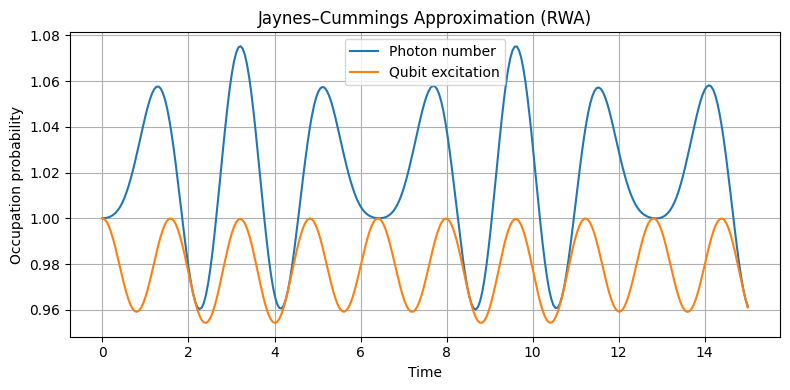

In [ ]:
# Hamiltonian terms
H_res = omega_R * a.dag()*a
H0 = tensor(qeye(N), H_qubit) + omega * a.dag() * a

# Interaction (RWA only)
H_1 = g_a * (a * tensor(qeye(N), tau_z_sigma_plus) + adag * tensor(qeye(N), tau_z_sigma_minus)) \
   + g_b * (a * tensor(qeye(N), tau_plus) + adag * tensor(qeye(N), tau_minus))


H_rwa = H0 + H_1

# Solve dynamics
res_rwa = mesolve(H_rwa, psi0, tlist, [], [n_photon, proj_excited_rws])

# Plot
plt.figure(figsize=(8, 4))
plt.plot(tlist, res_rwa.expect[0], label='Photon number', color='tab:blue')
plt.plot(tlist, res_rwa.expect[1], label='Qubit excitation', color='tab:orange')
plt.title('Jaynes–Cummings Approximation (RWA)')
plt.xlabel('Time')
plt.ylabel('Occupation probability')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


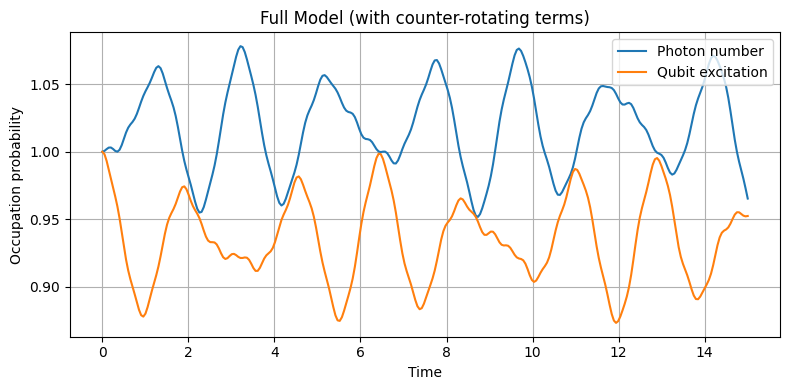

In [ ]:
# Full interaction (RWA + counter-rotating)
H_2 = g_a * (adag * tensor(qeye(N), tau_z_sigma_plus) + a * tensor(qeye(N), tau_z_sigma_minus)) \
   + g_b * (adag * tensor(qeye(N), tau_plus) + a * tensor(qeye(N), tau_minus))

H_full = H0 + H_1 +H_2

# Solve dynamics
res_full = mesolve(H_full, psi0, tlist, [], [n_photon, proj_excited])

# Plot
plt.figure(figsize=(8, 4))
plt.plot(tlist, res_full.expect[0], label='Photon number', color='tab:blue')
plt.plot(tlist, res_full.expect[1], label='Qubit excitation', color='tab:orange')
plt.title('Full Model (with counter-rotating terms)')
plt.xlabel('Time')
plt.ylabel('Occupation probability')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


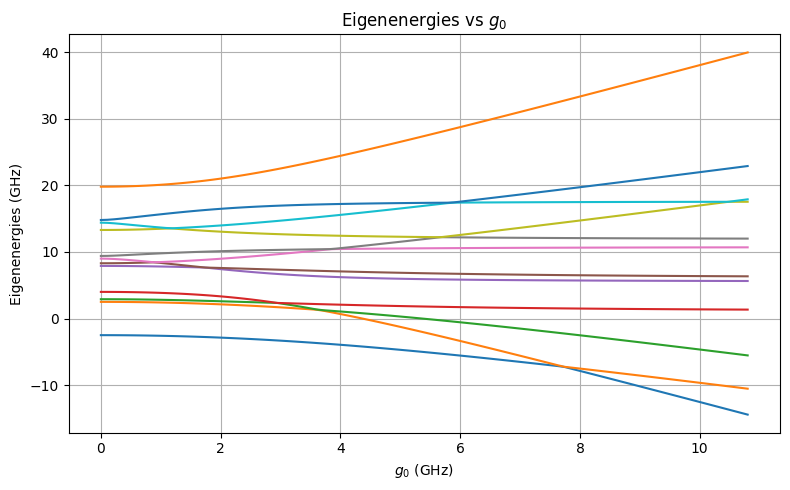

[-2.5  2.5  2.9  4.   7.9  8.3  9.   9.4 13.3 14.4 14.8 19.8]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from qutip import *

# ----- Parameters -----
omega_R = 5.4 * 2 * np.pi    # GHz -> rad/s
E_plus = 18 * 2 * np.pi     # GHz
E_minus = 8 * 2 * np.pi   # GHz
tunnel_coupling = 9.6 * 2 * np.pi

phi = np.pi / 4               # 45 degrees for tunneling
theta = np.pi / 4             # 45 degrees for g_a/g_b

t_sc = tunnel_coupling * np.cos(phi)
t_sf = tunnel_coupling * np.sin(phi)

# Coupling scan
g0_vals = np.linspace(0, 2 * omega_R, 100)   # GHz range converted to rad/s
g_angle = np.pi / 4                            # 45 degrees

# ----- System dimensions -----
Nph = 3             # photon cutoff
Ndot = 4            # 4-level system (|L↑>, |L↓>, |R↑>, |R↓>)

# Operators on dot+spin system
I4 = qeye(Ndot)
a = destroy(Nph)
adag = a.dag()
Iph = qeye(Nph)

# Define the system states in this order:
# |L↑>, |L↓>, |R↑>, |R↓>
# Define Pauli-like ops for spin (σ) and dot (τ)
# Custom matrices for 4-level space (manually construct):

# σ_z acts on spin up/down
sigma_z = Qobj(np.diag([1, -1, 1, -1]))
sigma_p = Qobj([[0, 1, 0, 0],
                [0, 0, 0, 0],
                [0, 0, 0, 1],
                [0, 0, 0, 0]])
sigma_m = sigma_p.dag()

# τ_z acts on L/R
tau_z = Qobj([[1, 0, -1, 0],
              [0, 1, 0, -1],
              [-1, 0, 1, 0],
              [0, -1, 0, 1]]) / 2

tau_p = Qobj([[0, 0, 1, 0],
              [0, 0, 0, 1],
              [0, 0, 0, 0],
              [0, 0, 0, 0]])
tau_m = tau_p.dag()

# Tensor to total Hilbert space
def tensor_op(dot_op, ph_op):
    return tensor(dot_op, ph_op)

# Hamiltonian H_0
H0 = tensor_op(I4, omega_R * adag * a) \
     + tensor_op((E_plus + E_minus)/4 * tau_z, Iph) \
     + tensor_op((E_plus - E_minus)/4 * sigma_z, Iph)

# Storage for eigenenergies
eigenvals = []

# Sweep over g0
for g0 in g0_vals:
    g_a = g0 * np.cos(g_angle)
    g_b = g0 * np.sin(g_angle)

    # Interaction Hamiltonians
    H1 = g_a * (tensor_op(tau_z * sigma_p, a) + tensor_op(tau_z * sigma_m, adag)) \
       + g_b * (tensor_op(tau_p, a) + tensor_op(tau_m, adag))

    H2 = g_a * (tensor_op(tau_z * sigma_m, a) + tensor_op(tau_z * sigma_p, adag)) \
       + g_b * (tensor_op(tau_m, a) + tensor_op(tau_p, adag))

    H = H0 + H1 + H2

    evals = H.eigenenergies()
    eigenvals.append(evals[:16])  # plot lowest 8 energies

# Convert to numpy array for plotting
eigenvals = np.array(eigenvals)


# ----- Plotting -----
plt.figure(figsize=(8, 5))
for i in range(eigenvals.shape[1]):
    plt.plot(g0_vals / (2*np.pi), eigenvals[:, i] / (2*np.pi), label=f'Level {i+1}')

plt.xlabel(r'$g_0$ (GHz)')
plt.ylabel('Eigenenergies (GHz)')
plt.title('Eigenenergies vs $g_0$')
plt.grid(True)
plt.tight_layout()
plt.show()
print(np.round(eigenvals[0] / (2*np.pi), 6))